In [ ]:
# -*- coding: utf-8 -*-
"""models.ipynb - Bug Free Version"""

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception
import matplotlib.pyplot as plt
import os


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Dataset Paths
train_dir = '/content/drive/MyDrive/Medicinal_Plants_Dataset/train'
test_dir = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test'


In [16]:
# Parameters
batch_size = 1     # as in your original code (note: very slow)
epochs = 8         # unified value (no mismatch now)
img_height = 180
img_width = 180


In [ ]:
# Data Generators
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)


Found 12020 images belonging to 200 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(
    directory=test_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)



Found 5973 images belonging to 200 classes.


In [ ]:
# Load Pretrained Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False
base_model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 89, 89,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 89, 89,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 89, 89,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 87, 87,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 87, 87,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 87, 87,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 87, 87,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 87, 87,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 87, 87,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 87, 87,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 87, 87,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 44, 44,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 44, 44,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 44, 44,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 44, 44,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 44, 44,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# Automatically detect number of classes
num_classes = train_data_gen.num_classes



In [ ]:
# Build Model
xception_net = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')   # auto-adjusts to dataset
])

xception_net.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 6, 6, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       409,800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,271,280 (81.14 MB)

 Trainable params: 409,800 (1.56 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# Compile
xception_net.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])



In [17]:
# Train
history = xception_net.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen
)



Epoch 1/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 180s 15ms/step - accuracy: 0.9620 - loss: 0.1812 - val_accuracy: 0.9739 - val_loss: 0.1284
Epoch 2/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 144s 12ms/step - accuracy: 0.9713 - loss: 0.1372 - val_accuracy: 0.9864 - val_loss: 0.0888
Epoch 3/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 144s 12ms/step - accuracy: 0.9826 - loss: 0.0998 - val_accuracy: 0.9890 - val_loss: 0.0771
Epoch 4/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 181s 15ms/step - accuracy: 0.9862 - loss: 0.0758 - val_accuracy: 0.9930 - val_loss: 0.0524
Epoch 5/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 181s 15ms/step - accuracy: 0.9908 - loss: 0.0569 - val_accuracy: 0.9956 - val_loss: 0.0408
Epoch 6/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 169s 12ms/step - accuracy: 0.9918 - loss: 0.0481 - val_accuracy: 0.9972 - val_loss: 0.0298
Epoch 7/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 183s 15ms/step - accuracy: 0.9957 - loss: 0.0339 - val_accuracy: 0.9990 - val_loss: 0.0213
Epoch 8/8
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 182s 15ms/step - ac

In [18]:
# Save Model
xception_net.save('Medicinal_plant8.h5')


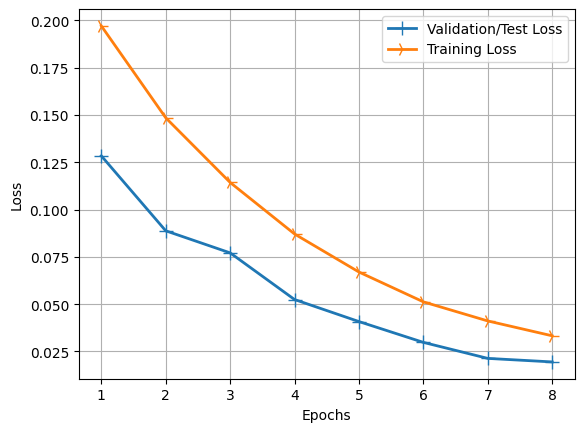

In [19]:
# Plot Loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_range = range(1, len(loss_values) + 1)

plt.plot(epochs_range, val_loss_values, label='Validation/Test Loss', linewidth=2.0, marker='+', markersize=10.0)
plt.plot(epochs_range, loss_values, label='Training Loss', linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



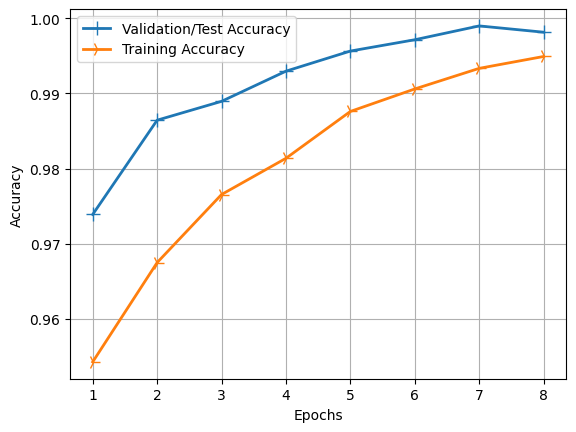

In [20]:
# Plot Accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs_range, val_acc_values, label='Validation/Test Accuracy', linewidth=2.0, marker='+', markersize=10.0)
plt.plot(epochs_range, acc_values, label='Training Accuracy', linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""models.ipynb - Bug Free Version"""

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception
import matplotlib.pyplot as plt
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset Paths
train_dir = '/content/drive/MyDrive/Medicinal_Plants_Dataset/train'
test_dir = '/content/drive/MyDrive/Medicinal_Plants_Dataset/test'

# Parameters
batch_size = 1     # as in your original code (note: very slow)
epochs = 6         # unified value (no mismatch now)
img_height = 180
img_width = 180

# Data Generators
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(
    directory=test_dir,
    batch_size=batch_size,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

# Load Pretrained Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False
base_model.summary()

# Automatically detect number of classes
num_classes = train_data_gen.num_classes

# Build Model
xception_net = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')   # auto-adjusts to dataset
])

xception_net.summary()

# Compile
xception_net.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train
history = xception_net.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    verbose=2
)

# Save Model
xception_net.save('plant.h5')

# Plot Loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_range = range(1, len(loss_values) + 1)

plt.plot(epochs_range, val_loss_values, label='Validation/Test Loss', linewidth=2.0, marker='+', markersize=10.0)
plt.plot(epochs_range, loss_values, label='Training Loss', linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot Accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs_range, val_acc_values, label='Validation/Test Accuracy', linewidth=2.0, marker='+', markersize=10.0)
plt.plot(epochs_range, acc_values, label='Training Accuracy', linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 12020 images belonging to 200 classes.
Found 5973 images belonging to 200 classes.


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 89, 89,    │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 89, 89,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 89, 89,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 87, 87,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 87, 87,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 87, 87,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 87, 87,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 87, 87,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 87, 87,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 87, 87,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 87, 87,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 44, 44,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 44, 44,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 44, 44,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 44, 44,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 44, 44,    │          0 │ add_12[0][0]    

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 6, 6, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       409,800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,271,280 (81.14 MB)

 Trainable params: 409,800 (1.56 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/6
12020/12020 ━━━━━━━━━━━━━━━━━━━━ 5953s 495ms/step - accuracy: 0.3568 - loss: 3.2753 - val_accuracy: 0.7512 - val_loss: 1.0481
Epoch 2/6
 7516/12020 ━━━━━━━━━━━━━━━━━━━━ 12:24 165ms/step - accuracy: 0.7299 - loss: 1.1053